In [77]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calculate_log as callog
%matplotlib inline

In [159]:
class opt:
    outf = 'extracted_features'
    backbone_name = 'resnet18_vanilla_simclr_cifar10'
    dataset ='cifar10'
    fet = ''
    fet2 = 'mean'

In [160]:
ood_dataset=['svhn','lsun_fix','imagenet_fix','lsun_resize','imagenet_resize'] 
# ood_dataset = ['cifa r10']
out_dataset=ood_dataset
num_out_datasets = len(ood_dataset)

In [109]:
ind_dataset='cifar10'
experiment = opt.backbone_name
ae_type = 'vanilla_AE'
prefix = 'confidence' #confidence

layer_num=12
epoch=500
ind=[]
ind_train=[]
ood=dict()
for i in range(layer_num):
    ood[i]=[]
    ind.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    ind_train.append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_in_{}_epoch_{}{}_train.txt'.format(prefix, i,ind_dataset,epoch, opt.fet))))
    for j in range(len(ood_dataset)):
        ood[i].append(np.loadtxt(os.path.join('trained_autoencoders',ae_type,experiment,'{}_layer_{}_out_{}_epoch_{}{}_model1.txt'.format(prefix, i,ood_dataset[j],epoch, opt.fet))))

# ind_MD = np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_in_{}_original_single.npy'.format(ind_dataset)))[:,:-1]
# ood_MD=[]
# for j in range(len(ood_dataset)):
#     ood_MD.append(np.load(os.path.join('/HDD0','ParkYH','deep_Mahalanobis_detector','output_features',ind_dataset,'Mahalanobis_out_{}_original_single.npy'.format(ood_dataset[j])))[:,:-1])

OSError: trained_autoencoders/vanilla_AE/resnet18_vanilla_simclr_cifar10/confidence_layer_9_in_cifar10_epoch_500.txt not found.

In [161]:
train_ind_feature=dict()
test_ind_feature=dict()
test_ood_feature=dict()
num_ood=dict()

layer_num=12
for i in range(layer_num):
    test_ood_feature[i]=[]
    num_ood[i]=[]
    train_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+'_'+opt.fet2+'_train_ind.npy'))
    test_ind_feature[i]=np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+opt.dataset+'_'+opt.fet2+'_test_ind.npy'))
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_feature[i].append(np.load(os.path.join(opt.outf,opt.backbone_name,'Features_from_layer_'+str(i)+'_'+out_dataset[j]+'_'+opt.fet2+'_test_ood.npy')))
        num_ood[i].append(test_ood_feature[i][j].shape[0])
train_data_ind = train_ind_feature
test_data_ind = test_ind_feature
test_data_ood = test_ood_feature
for i in range(layer_num):
    print(train_data_ind[i].shape)

5
5
5
5
5
5
5
5
5
5
5
5
(50000, 64)
(50000, 64)
(50000, 64)
(50000, 128)
(50000, 128)
(50000, 256)
(50000, 256)
(50000, 512)
(50000, 512)
(50000, 512)
(50000, 2048)
(50000, 128)


In [162]:
train_ind_norm=dict()
test_ind_norm=dict()
test_ood_norm=dict()

layer_num=12
for i in range(layer_num):
#     layer=i
    layer=layer_num-1
    test_ood_norm[i]=[]
    num_ood[i]=[]
    train_ind_norm[i]=np.linalg.norm(train_ind_feature[layer],axis=1)
    test_ind_norm[i]=np.linalg.norm(test_ind_feature[layer],axis=1)
    print(num_out_datasets)
    for j in range(num_out_datasets):
        test_ood_norm[i].append(np.linalg.norm(test_ood_feature[layer][j],axis=1))


# norm_train_ind = train_ind_feature[13].norm(axis=1)

5
5
5
5
5
5
5
5
5
5
5
5


{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000001, 'AUIN': 0.9455782318290611, 'AUOUT': 0.9127061679182312}}

{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000001, 'AUIN': 0.9455782318290611, 'AUOUT': 0.9127061679182312}}

{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000001, 'AUIN': 0.9455782318290611, 'AUOUT': 0.9127061679182312}}

{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000001, 'AUIN': 0.9455782318290611, 'AUOUT': 0.9127061679182312}}

{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000001, 'AUIN': 0.9455782318290611, 'AUOUT': 0.9127061679182312}}

{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000001, 'AUIN': 0.9455782318290611, 'AUOUT': 0.9127061679182312}}

{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000001, 'AUIN': 0.9455782318290611, 'AUOUT': 0.9127061679182312}}

{'TMP': {'TNR': 0.5742, 'AUROC': 0.93212466, 'DTACC': 0.8684000000000

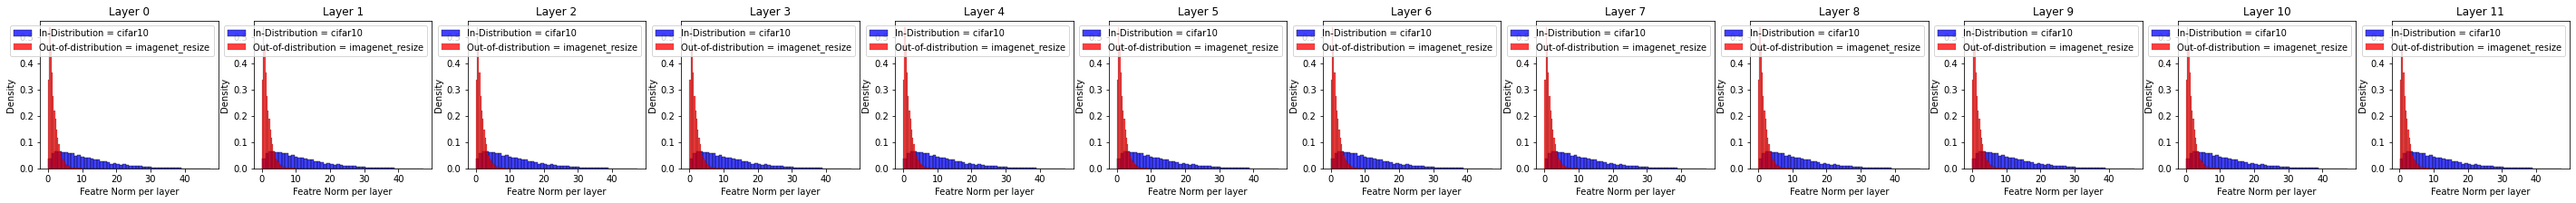

In [167]:
ood_index=4
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(test_ind_norm[layer],test_ood_norm[layer][ood_index])
    print(results[layer])
    print('')
    sns.histplot(ax=axs[layer],data=test_ind_norm[layer],color='blue',stat='density',bins=50)
    sns.histplot(ax=axs[layer],data=test_ood_norm[layer][ood_index],color='red',stat='density',bins=50)
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Featre Norm per layer')

In [134]:
# from sklearn.preprocessing import StandardScaler
# ind_norm_scaled=[]
# train_ind_norm_scaled=[]
# ood_norm_scaled=dict()
# for j in range(len(ood_dataset)):
#     ood_norm_scaled[j]=[]

# for i in range(layer_num):
#     scaler=StandardScaler()
#     scaler.fit(train_ind_norm[i].reshape(-1,1))
#     train_ind_norm_scaled.append(scaler.transform(train_ind_norm[i].reshape(-1,1)).reshape(-1))
#     ind_norm_scaled.append(scaler.transform(test_ind_norm[i].reshape(-1,1)).reshape(-1))
#     for j in range(len(ood_dataset)):
#         ood_norm_scaled[j].append(scaler.transform(test_ood_norm[i][j].reshape(-1,1)).reshape(-1))

In [135]:
# ind_norm_scaled_max=np.min(ind_norm_scaled,0)
# train_ind_norm_scaled_max = np.min(train_ind_norm_scaled,0)
# ood_norm_scaled_max=[]
# for j in range(len(ood_dataset)):
#     ood_norm_scaled_max.append(np.min(ood_norm_scaled[j],0))

In [136]:
# ood_num=1
# sns.histplot(ind_norm_scaled_max,color='blue')
# sns.histplot(ood_norm_scaled_max[ood_num],color='red')
# plt.legend(['CIFAR10',out_dataset[ood_num]])
# plt.title('Max-Scaled Feature Norm')
# plt.xlabel('Feature Norm')

In [137]:
# ind_norm_scaled_max_exp=np.exp(ind_norm_scaled_max)
# train_ind_norm_scaled_max_exp= np.exp(train_ind_norm_scaled_max)
# ood_norm_scaled_max_exp=[]
# for j in range(len(ood_dataset)):
#     ood_norm_scaled_max_exp.append(np.exp(ood_norm_scaled_max[j]))

In [138]:
# ood_num=1
# sns.histplot(ind_norm_scaled_max_exp,color='blue')
# sns.histplot(ood_norm_scaled_max_exp[ood_num],color='red')
# plt.legend(['CIFAR10',out_dataset[ood_num]])
# plt.title('Max-Scaled Feature Norm, encoder = MoCo ver2')
# plt.xlabel('Feature Norm')

In [139]:
# ind_revised=[]
# ind_train_revised=[]
# ood_revised=dict()

# for i in range(layer_num):
#     ood_revised[i]=[]
#     ind_revised.append(ind[i]/ind_norm_scaled_max_exp)
#     ind_train_revised.append(ind_train[i]/train_ind_norm_scaled_max_exp)
#     for j in range(len(ood_dataset)):
#         ood_revised[i].append(ood[i][j]/ood_norm_scaled_max_exp[j])

In [143]:
ind_revised=[]
ind_train_revised=[]
ood_revised=dict()

layer_num=9
for i in range(layer_num):
    ood_revised[i]=[]
    ind_revised.append(ind[i]/(test_ind_norm[i]+1e-3))
    ind_train_revised.append(ind_train[i]/(train_ind_norm[i]+1e-3))
    for j in range(len(ood_dataset)):
        ood_revised[i].append(ood[i][j]/(test_ood_norm[i][j]+1e-3))

In [144]:
# layer=2
# sns.histplot(test_ind_norm[layer],color='blue')
# sns.histplot(test_ood_norm[layer][0],color='red')
# plt.legend(['CIFAR10','SVHN'])
# plt.title('Extracted from Layer 2, encoder = MoCo ver2')
# plt.xlabel('Feature Norm')

{'TMP': {'TNR': 0.06545789797172707, 'AUROC': 0.60196163952059, 'DTACC': 0.5832742163491088, 'AUIN': 0.41589360177525114, 'AUOUT': 0.7679608259397278}}

{'TMP': {'TNR': 0.2078979717271051, 'AUROC': 0.7809510410264291, 'DTACC': 0.7154638905961893, 'AUIN': 0.6441624187499102, 'AUOUT': 0.8766268681504844}}

{'TMP': {'TNR': 0.6257298709280885, 'AUROC': 0.9230991356791641, 'DTACC': 0.8523983405039951, 'AUIN': 0.8556216942943029, 'AUOUT': 0.9598531402716932}}

{'TMP': {'TNR': 0.7307928703134603, 'AUROC': 0.9487006069452982, 'DTACC': 0.8792045175169022, 'AUIN': 0.9026126560059675, 'AUOUT': 0.9761267748367994}}

{'TMP': {'TNR': 0.902158881376767, 'AUROC': 0.9805259987707438, 'DTACC': 0.9331975722188076, 'AUIN': 0.9612347669934657, 'AUOUT': 0.9913230555413791}}

{'TMP': {'TNR': 0.9202135832821143, 'AUROC': 0.9833013368162262, 'DTACC': 0.936860049170252, 'AUIN': 0.9637232036196729, 'AUOUT': 0.9929916051821586}}

{'TMP': {'TNR': 0.9802934849416103, 'AUROC': 0.9951827366318378, 'DTACC': 0.96850503

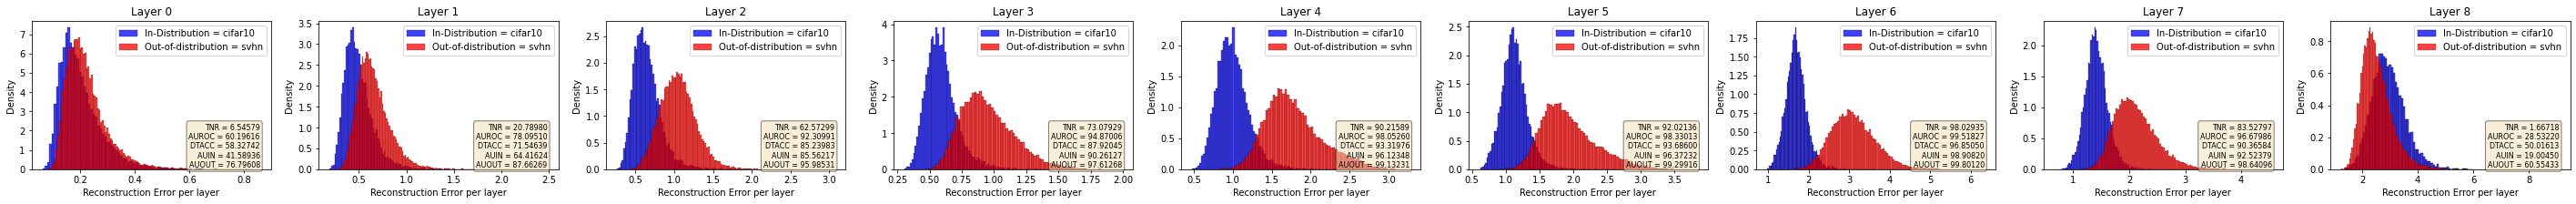

In [142]:
layer_num=9
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind[layer],ood[layer][ood_index])
    print(results[layer])
    print('')
    sns.histplot(ax=axs[layer],data=-ind[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=-ood[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind[layer]),np.max(-ood[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)



{'TMP': {'TNR': 0.47168869084204057, 'AUROC': 0.9070630032267977, 'DTACC': 0.8356666564228642, 'AUIN': 0.8554151145576829, 'AUOUT': 0.9482716219602878}}
{'TMP': {'TNR': 0.5863936693300553, 'AUROC': 0.9313389827904119, 'DTACC': 0.8657693915181315, 'AUIN': 0.892024301605602, 'AUOUT': 0.9619007771964545}}
{'TMP': {'TNR': 0.6894975414874001, 'AUROC': 0.9479554701905347, 'DTACC': 0.8853397049784881, 'AUIN': 0.9163090267092148, 'AUOUT': 0.9717583509955359}}
{'TMP': {'TNR': 0.7115857406269207, 'AUROC': 0.9525373501843885, 'DTACC': 0.8906524585125998, 'AUIN': 0.9240003227350667, 'AUOUT': 0.9749001519903665}}
{'TMP': {'TNR': 0.7520359557467732, 'AUROC': 0.9589684618930547, 'DTACC': 0.9000287338660111, 'AUIN': 0.9339747220378768, 'AUOUT': 0.9785568319661434}}
{'TMP': {'TNR': 0.7566456668715427, 'AUROC': 0.9594369429932391, 'DTACC': 0.8999095267363246, 'AUIN': 0.9339899585522203, 'AUOUT': 0.9791559299777436}}
{'TMP': {'TNR': 0.7929855562384758, 'AUROC': 0.964743077750461, 'DTACC': 0.9078307928703

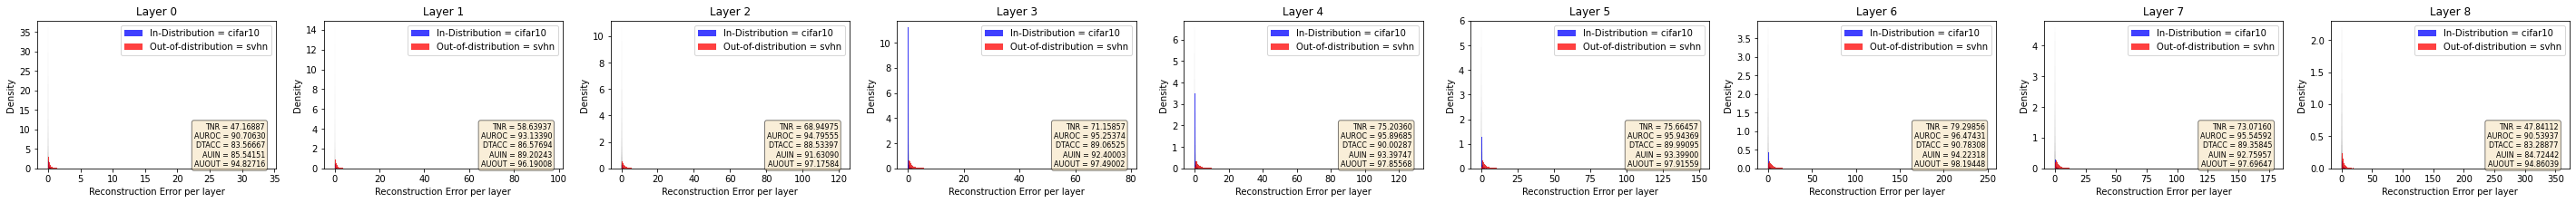

In [145]:
ood_index=0
fig,axs=plt.subplots(1,layer_num,figsize=(50,3))
results=dict()
for layer in range(layer_num):
    results[layer],_,_ = callog.metric(ind_revised[layer],ood_revised[layer][ood_index])
    print(results[layer])
    sns.histplot(ax=axs[layer],data=-ind_revised[layer],color='blue',stat='density')
    sns.histplot(ax=axs[layer],data=-ood_revised[layer][ood_index],color='red',stat='density')
    axs[layer].legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
    axs[layer].set_title('Layer '+str(layer))
    axs[layer].set_xlabel('Reconstruction Error per layer')

    rst = results[layer]['TMP']
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
    axs[layer].text(np.max((np.max(-ind_revised[layer]),np.max(-ood_revised[layer][ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)




In [128]:
# ind_scaled_mul = ind_revised[0]*ind_revised[1]*ind_revised[2]*ind_revised[3]*ind_revised[4]*ind_revised[5]*ind_revised[6]*ind_revised[7]*ind_revised[8]
# ood_scaled_mul = []
# for j in range(len(ood_dataset)):
#     ood_scaled_mul.append(ood_revised[0][j]*ood_revised[1][j]*ood_revised[2][j]*ood_revised[3][j]*ood_revised[4][j]*ood_revised[5][j]*ood_revised[6][j]*ood_revised[7][j]*ood_revised[8][j])

In [129]:
# ood_index= 2
# print(ood_dataset[ood_index])
# results_max,_,_ = callog.metric(ind_scaled_mul,ood_scaled_mul[ood_index])
# print(results_max)
# sns.histplot(data=-ind_scaled_mul,color='blue',stat='density')
# sns.histplot(data=-ood_scaled_mul[ood_index],color='red',stat='density')
# plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
# plt.title('Multipled Anomaly')
# plt.xlabel('Reconstruction Error per layer')

# rst = results_max['TMP']
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
# print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
# plt.text(np.max((np.max(-ind_scaled_mul),np.max(-ood_scaled_mul[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)

In [130]:
from sklearn.preprocessing import StandardScaler
ind_scaled=[]
ood_scaled=dict()
for j in range(len(ood_dataset)):
    ood_scaled[j]=[]

for i in range(layer_num):
    scaler=StandardScaler()
    scaler.fit(ind_train_revised[i].reshape(-1,1))
    ind_scaled.append(scaler.transform(ind_revised[i].reshape(-1,1)).reshape(-1))
    for j in range(len(ood_dataset)):
        ood_scaled[j].append(scaler.transform(ood_revised[i][j].reshape(-1,1)).reshape(-1))

In [131]:
ind_scaled_max=np.min(ind_scaled,0)
ood_scaled_max=[]
for j in range(len(ood_dataset)):
    ood_scaled_max.append(np.min(ood_scaled[j],0))

svhn
{'TMP': {'TNR': 0.7319837123540258, 'AUROC': 0.9568718308236017, 'DTACC': 0.900907590657652, 'AUIN': 0.9345284906593248, 'AUOUT': 0.9755438311042929}}
73.20 / 95.69 / 90.09


Text(1691.020653169067, 0, 'TNR = 73.19837\nAUROC = 95.68718\nDTACC = 90.09076\nAUIN = 93.45285\nAUOUT = 97.55438')

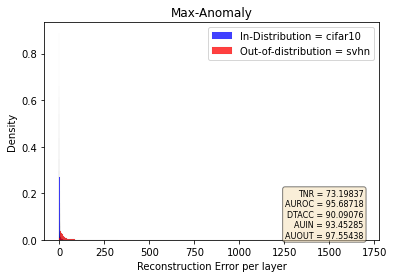

In [132]:
ood_index= 0
print(ood_dataset[ood_index])
results_max,_,_ = callog.metric(ind_scaled_max,ood_scaled_max[ood_index])
print(results_max)
sns.histplot(data=-ind_scaled_max,color='blue',stat='density')
sns.histplot(data=-ood_scaled_max[ood_index],color='red',stat='density')
plt.legend(['In-Distribution = {}'.format(ind_dataset),'Out-of-distribution = {}'.format(ood_dataset[ood_index])])
plt.title('Max-Anomaly')
plt.xlabel('Reconstruction Error per layer')

rst = results_max['TMP']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
metric = 'TNR = {:.5f}\nAUROC = {:.5f}\nDTACC = {:.5f}\nAUIN = {:.5f}\nAUOUT = {:.5f}'.format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC'],100*rst['AUIN'],100*rst['AUOUT'])
print("{:.2f} / {:.2f} / {:.2f}".format(100*rst['TNR'],100*rst['AUROC'],100*rst['DTACC']))
plt.text(np.max((np.max(-ind_scaled_max),np.max(-ood_scaled_max[ood_index]))),0, metric, fontsize=8,horizontalalignment='right', verticalalignment='bottom', bbox=props)